## Introduction

This notebook is to analyse book rating in the dataset provided at http://www2.informatik.uni-freiburg.de/~cziegler/BX/.

**Pre-processing data**

The provided CSV files were encoding in ISO-8859-1, which resulted some weird characters when displaying in Unicode. I used `iconv ` to change its encoding to UTF-8. However it's not enough and I had to use `sed` to replace broken German characters.

In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [125]:
book = pd.read_csv('books.csv', sep = ';', encoding = 'utf-8', dtype = { 'Year-Of-Publication': int })

ValueError: invalid literal for int() with base 10: 'DK Publishing Inc'

In [3]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271378 non-null  object
 3   Year-Of-Publication  271379 non-null  object
 4   Publisher            271377 non-null  object
 5   Image-URL-S          271379 non-null  object
 6   Image-URL-M          271379 non-null  object
 7   Image-URL-L          271376 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [4]:
book.duplicated().sum()

0

The book dataframe is clean without null values and duplicated values

In [5]:
user = pd.read_csv('BX-users.csv', sep = ';')

In [6]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [30]:
user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

There are 110762 missing values in the Age columns, however, the questions are not related to Age so the missing values will not be handled

In [7]:
user.duplicated().sum()

0

In [8]:
rating =  pd.read_csv('BX-Book-Ratings.csv', sep = ';')

In [9]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [10]:
rating.duplicated().sum()

0

The rating dataframe is clean without null values and duplicated values

## Question: How many users have made exactly 2 ratings?

In [50]:
book_ratings_grouped_by_users = rating.groupby('User-ID')['Book-Rating'].count()

In [56]:
number_users_2_rating = book_ratings_grouped_by_users[book_ratings_grouped_by_users == 2].count()
print(f"There are {number_users_2_rating} users made exactly 2 ratings")

There are 12502 users made exactly 2 ratings


## Question: Find the mean, median, mode, and range for the number of ratings made for each book

### Mean for ratings of each book

In [13]:
book_rating = pd.merge(rating, book, on = 'ISBN', how = 'inner')

In [33]:
mean = book_rating.groupby('Book-Title').mean()
mean.reset_index(inplace = True)

In [60]:
mean.rename(columns = {'Book-Rating': 'Mean-Rating'}, inplace = True)

In [61]:
mean[['Book-Title', 'Mean-Rating']]

,Book-Title,Mean-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00
...,...,...
241085,Öko-Tricks und Bio-Schwindel: Damit uns Wirtsc...,0.00
241086,Ökotopia: Notizen und Reportagen von William W...,4.00
241087,Öngeles fugaces (Falling Angels),0.80
241088,Örsringen: Roman,3.00


### Median for ratings of each book

In [62]:
median = book_rating.groupby('Book-Title').median()
median.reset_index(inplace = True)
median.rename(columns = {'Book-Rating': 'Median-Rating'}, inplace = True)

In [63]:
median[['Book-Title', 'Median-Rating']]

,Book-Title,Median-Rating
0,A Light in the Storm: The Civil War Diary of ...,0.0
1,Always Have Popsicles,0.0
2,Apple Magic (The Collector's series),0.0
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.0
4,Beyond IBM: Leadership Marketing and Finance ...,0.0
...,...,...
241085,Öko-Tricks und Bio-Schwindel: Damit uns Wirtsc...,0.0
241086,Ökotopia: Notizen und Reportagen von William W...,4.0
241087,Öngeles fugaces (Falling Angels),0.0
241088,Örsringen: Roman,3.0


In [16]:
mode = book_rating.groupby('Book-Title')['Book-Rating'].agg(pd.Series.mode).to_frame()
mode.reset_index(inplace = True)

In [71]:
mode.rename(columns = {0: 'Mode-Rating'}, inplace = True)
mode

,Book-Title,Mode-Rating
0,A Light in the Storm: The Civil War Diary of ...,0
1,Always Have Popsicles,0
2,Apple Magic (The Collector's series),0
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8
4,Beyond IBM: Leadership Marketing and Finance ...,0
...,...,...
241085,Öko-Tricks und Bio-Schwindel: Damit uns Wirtsc...,0
241086,Ökotopia: Notizen und Reportagen von William W...,4
241087,Öngeles fugaces (Falling Angels),0
241088,Örsringen: Roman,3


In [44]:
range_df = book_rating.groupby('Book-Title').apply(lambda x: x['Book-Rating'].max() - x['Book-Rating'].min()).to_frame()
range_df.reset_index(inplace = True)

In [72]:
range_df.rename(columns = {0: 'Range-of-Rating'}, inplace = True)
range_df

,Book-Title,Range-of-Rating
0,A Light in the Storm: The Civil War Diary of ...,9
1,Always Have Popsicles,0
2,Apple Magic (The Collector's series),0
3,"Ask Lily (Young Women of Faith: Lily Series, ...",0
4,Beyond IBM: Leadership Marketing and Finance ...,0
...,...,...
241085,Öko-Tricks und Bio-Schwindel: Damit uns Wirtsc...,0
241086,Ökotopia: Notizen und Reportagen von William W...,0
241087,Öngeles fugaces (Falling Angels),4
241088,Örsringen: Roman,0


### Question: If you look for users and ratings, does Pareto principle hold?

In [79]:
rng = np.random.default_rng()
total_users = user['User-ID'].nunique()

def pareto():
    '''
    Randomly take 80% of book ratings and return the percentage of users 
    who created those ratings over the total users.
    '''
    rating_80 = rating.sample(frac=0.8,random_state=rng.bit_generator)
    return rating_80['User-ID'].nunique() * 100 / total_users 

(30.0, 35.0)

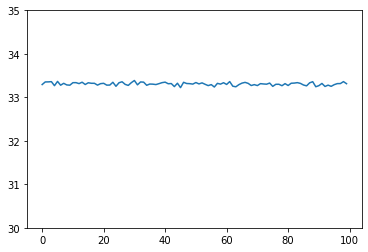

In [124]:
# Calculate the Pareto percentage over n iterations to see if
# the result is consistent 
n = 100
y = []
x = []
for i in range(n):
    x.append(i)
    y.append(pareto())

plt.plot(x, y)
plt.ylim(30, 35)

It seems that 80% ratings were created by around 33% users, so the Pareto principle did not apply here. 